In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
x = np.random.rand(*(3,4))

In [26]:
shape = x.shape

In [27]:
x = x.flatten()

In [30]:
x.shape

(12,)

In [29]:
x.reshape(shape)

array([[ 0.33204814,  0.19680561,  0.76467356,  0.99651829],
       [ 0.01587998,  0.99522478,  0.62280648,  0.43787677],
       [ 0.71871799,  0.15322397,  0.59402972,  0.43565784]])

In [24]:
m

array([[ 0.36252522,  0.8371896 ,  0.89277702,  0.80801091],
       [ 0.03149771,  0.17192048,  0.87130245,  0.24371242],
       [ 0.01131178,  0.88426048,  0.07940859,  0.92469819]])

In [11]:
x = np.array([1, 0, 1]) == np.array([1, 0, 0])

In [12]:
m = np.random.randn(1, 3)

In [13]:
m

array([[ 0.31161091, -0.89207368,  0.30458528]])

In [14]:
?np.where

In [15]:
mm = np.where(x, 0.3, 0)

In [51]:
mm = np.zeros((3,4))

In [52]:
mm[...] = 1

In [53]:
mm

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [54]:
def nd_gaussian(shape, center, cov):
    """ Make a square gaussian kernel.
    shape is the shape of the output array
    cov is the covariance (we assume a diagonal covariance matrix)
    """
    import scipy.stats
    edge_grids = np.meshgrid(*[np.arange(-0.5, i + 0.5, 1.0, float)
                               for i in shape], indexing='ij')
    end_slices = [slice(1, i + 1) for i in shape]
    start_slices = [slice(0, i) for i in shape]

    cum = np.ones(shape)
    for i, edge_grid in enumerate(edge_grids):
        cum_i = scipy.stats.norm.cdf(edge_grid, loc=center[i], scale = cov)
        cum *= cum_i[end_slices] - cum_i[start_slices]

    return cum

In [59]:
x = nd_gaussian((3,3),(1,1),0.6)

In [61]:
x

array([[ 0.03846255,  0.11675795,  0.03846255],
       [ 0.11675795,  0.35443357,  0.11675795],
       [ 0.03846255,  0.11675795,  0.03846255]])

In [62]:
np.argmax(x)

4

In [47]:
np.sum(x)

0.99999885339404104

In [64]:
occ = 0.2

### correction model

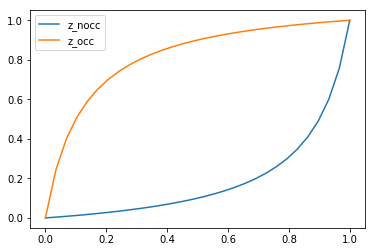

In [46]:
omega = 0.1
P_occ_z_nocc = lambda occ: (omega*occ) / ((1-omega)*(1-occ)+omega*(occ))
P_occ_z_occ = lambda occ: ((1-omega)*occ) / (omega*(1-occ)+(1-omega)*(occ))

occ = np.linspace(0, 1, 30)
p_z_nocc = map(P_occ_z_nocc, occ)
p_z_occ = map(P_occ_z_occ, occ)

plt.plot(occ, p_z_nocc, label='z_nocc')
plt.plot(occ, p_z_occ, label='z_occ')
plt.legend()

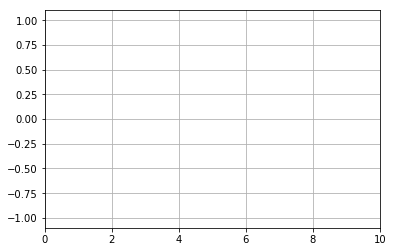

In [105]:
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()


In [107]:
?np.arange

In [149]:
x = np.zeros((3,3,4,4,4,4))

In [150]:
idx = np.arange(4)
from_idxs = np.repeat(idx, 4)
to_idxs = np.tile(idx, 4)

In [152]:
x[:,:, from_idxs, to_idxs , from_idxs, to_idxs ] = 1

In [155]:
x[0,1, 1, 0]

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [171]:
while True:
    steps = np.abs(np.around(np.random.normal(1, 0.6, 3)))
    steps = np.where(steps<1, 1, steps)
    print(steps)

 [ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1. 

[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  3.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  

[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  3.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  

[ 2.  1.  2.]
[ 2.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 2.  2.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  2.  2.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 2.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  2.  2.]
[ 1.  2.  1.]
[ 2.  1.  2.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  

[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 2.  2.  2.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 3.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  

[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 3.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  2.  2.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  

[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  2.  2.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 2.  2.  1.]
[ 1.  2.  1.]
[ 1.  

[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  2.  2.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 2.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  3.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  

[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  3.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  3.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  3.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  

[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  2.]
[ 2.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  

[ 2.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  3.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  2.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 3.  1.  2.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  

[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 1.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  3.  2.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  

[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  3.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  2.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  

[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  3.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  3.]
[ 2.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 2.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  

[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  2.]
[ 1.  1.  3.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  3.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 2.  1.  2.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  

[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  3.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 2.  2.  2.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  2.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  2.]
[ 1.  1.  2.]
[ 3.  2.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  2.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  

[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  2.  1.]
[ 1.  2.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  3.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 2.  2.  1.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  2.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  2.  1.]
[ 1.  1.  2.]
[ 1.  3.  2.]
[ 1.  2.  1.]
[ 1.  

[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  2.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  2.  1.]
[ 2.  1.  1.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 2.  1.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  2.  2.]
[ 1.  2.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 2.  1.  2.]
[ 1.  1.  1.]
[ 3.  1.  1.]
[ 2.  1.  2.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  1.]
[ 2.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 3.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  1.  2.]
[ 1.  1.  1.]
[ 1.  

KeyboardInterrupt: 

In [35]:
(3, 4) + (-1,)

(3, 4, -1)

In [36]:
?np.repeat

In [37]:
?np.tile

In [49]:
from time import time

time1 = time()
for _ in np.arange(10000):
    pass
time2 = time()
print("takes %f s" % (time2-time1))

time1 = time()
for _ in np.arange(10000):
    pass
time2 = time()
print("takes %f s" % (time2-time1))

takes 0.002372 s
takes 0.002389 s
